##Learning Objectives:

_____________
By the end of the lesson, all learners are expected to achieve the following objectives:

- Understand the fundamental concepts and applications of Base and Instruction tuned Language Models.
- Understand the shortcomings of Attention-based RNNs, and the need of Transformer models.



##Prerequisites:
_____

- Understanding of neural networks and deep learning.
- Familiarity with natural language processing (NLP) concepts such as tokenization, word embeddings, and text classification.
- Knowledge of recurrent neural networks (RNNs) and their limitations, such as the vanishing gradient problem.
- Understanding of attention mechanisms in neural networks, such as the Bahdanau and Luong attention models.
- Familiarity with transfer learning and its applications in NLP.
- Knowledge of Python programming and popular deep learning frameworks such as TensorFlow or PyTorch.

# 1. Basic of Transformers and Language Models

## 1.1 Transformers and Language Models

[A paper published in 2017](https://arxiv.org/abs/1706.03762) by Google researchers introduced a new neural network architecture called the Transformer. This architecture surpassed the performance of recurrent neural networks (RNNs) in machine translation tasks while also reducing training costs.

At the same time, a transfer learning method called [ULMFiT](https://arxiv.org/abs/1801.06146) showed that training LSTM networks on a large and diverse corpus could produce state-of-the-art text classifiers with minimal labeled data.

These two advancements inspired the creation of the  [Generative Pretrained Transformer (GPT)](https://arxiv.org/abs/2005.14165) and  [Bidirectional Encoder Representations from Transformers (BERT)](https://arxiv.org/abs/1810.04805), which combined the Transformer architecture with unsupervised learning.

These models eliminated the need to train task-specific architectures from scratch and significantly outperformed previous benchmarks in natural language processing (NLP).


**Transformers are Language Models:**

All the Transformer models mentioned above have been trained as language models. This indicates that they underwent self-supervised training using substantial amounts of unprocessed text. Self-supervised learning is a training method in which the model's inputs are used to automatically calculate the objective and the data does not require labeling.

This kind of model gains a statistical comprehension of the language it has been trained on, but it is not very helpful for specific practical tasks. As a result, the general pretrained model then undergoes a procedure known as transfer learning. The model is adjusted during this process on a specific task in a supervised manner, i.e., using annotated labels.


### 1.1.1 Types of Large Language Models
There are two types of Large Language Models (LLMs):
* Base LLM
* Instruction Tuned LLM



#### 1.1.1.1 Base Language Models:
Base LLMs are generally trained on two distinct language modeling objectives:


##### **a.)  Causal Language Modeling**
Causal language modeling is a task where the objective is to predict the next word in a sentence given the preceding n words. The prediction only depends on the past and present inputs, not the future ones, hence the term "causal". It is best suited for Decoder based models.

  Mathematically,
Given a sequence of tokens $X$ = {${x_1, x_2, ..., x_n}$}, the objective is to maximize the conditional probability of the next token ${X_{n+1}}$ given the preceding tokens: $P({X_{n+1}}| x_1, x_2, ..., x_n)$.
causal_modeling.svg

**Figure:** [Hugginface NLP Course](https://huggingface.co/learn/nlp-course/chapter1/4?fw=pt)



##### **b.) Masked Language Modeling**
As opposed to CLM, where the model attempts to predict the next sequences in a sentence, MLM attempts to predict the middle words in the sentence [(Devlin et al., 2019)](https://arxiv.org/abs/1907.11692). This ensures that the model learns contextual word representations and the learning is bi-directional. It is best suited for Encoder based models.

  Mathematically, given a sequence of text $X$ = {${x_{1}}$, ${x_{2}}$, ..., ${x_{n}}$}, a masked version of the sequence $\tilde{X}$ is created by replacing a subset of its tokens with a special masking token $[MASK]$. The task is then to predict the original values $X$ of the masked tokens based on the remaining unmasked tokens in $\tilde{X}$. This can be formulated as finding the probability distribution over the masked tokens given the unmasked tokens, i.e.,
$P({X_{m}}$ | ${X_{u}}$), where ${X_{m}}$ represents the masked tokens and ${X_{u}}$ represents the unmasked tokens.
masked_modeling.svg

**Figure:** [Hugginface NLP Course](https://huggingface.co/learn/nlp-course/chapter1/4?fw=pt)


**Info:** The percentile of tokens masked on the original BERT is 15%, however in the work by [(Wettig et al., 2022)](https://arxiv.org/abs/2202.08005), they suggest that 20% masking performs better for small-sized transformer models whereas huge models favor MLM probability as high as 40%.

#### **1.1.1.2 Instruction Tuned LLMs**
* These models are Trained or Finetuned on top of Base LLMs on a collection of tasks phrased as instructions.
* They are trained to follow instructions and gets good at following those instructions.
* Instruction tuning enables pre-trained LLMs to respond better to instructions and reduces the need for few-shot examples at the prompting stage.
* **RLHF:** Reinforcement Learning with Human Feedback combines reinforcement learning, which uses trial and error to learn from experience, with human feedback to improve the performance of AI models. By receiving feedback from humans, the model can learn more quickly and accurately.
* Example: ChatGPT

**Base LLMs vs. Instruction tuned LLMs:**
we can illustrate the differences between these two types of LLMs by considering the input-to-output mapping that are used for modeling:

**Example input:**

```
Please order me a pepperoni pizza with extra cheese and garlic sauce
```
**Output (Base LLM):**
```
Please order me a pepperoni pizza with extra cheese and garlic sauce along with mushrooms, a cold drink and garlic bread on the side.
```

**Output (Instruction Tuned):**
```
A pepperoni pizza with extra cheese and garlic sauce has been ordered for you, and will be delivered in 30 minutes or less.
```





A pre-trained LLM is typically evaluated on its capacity to complete a second set of linguistic problems that were not present during tuning, demonstrating its generalizability and zero-shot capability as shown in the example below:

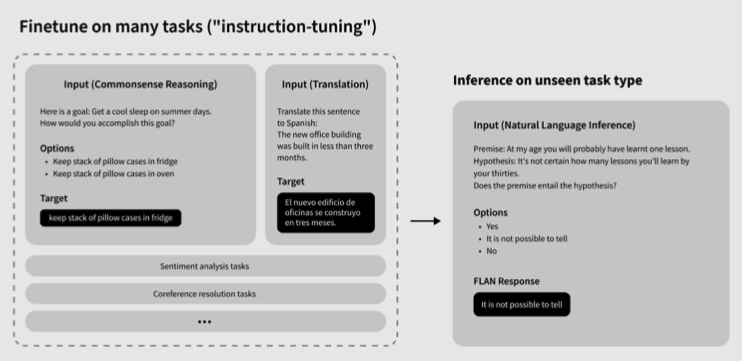

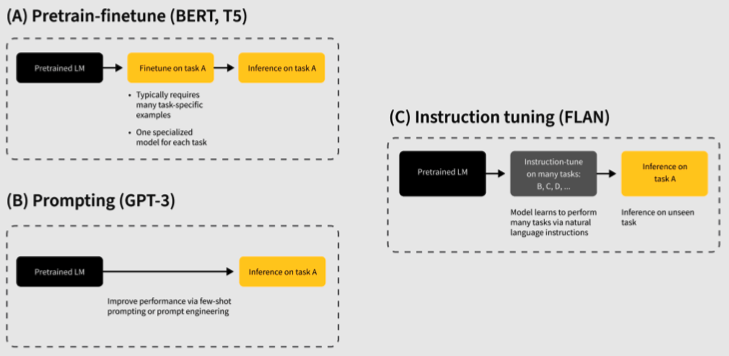

**Figure:** [FINETUNED LANGUAGE MODELS ARE ZERO-SHOT LEARNERS](https://arxiv.org/pdf/2109.01652.pdf)



## 1.2. Why Transformers over Attention-based / Vanilla RNNs?


### 1.2.1 Issues with Vanilla RNNs:
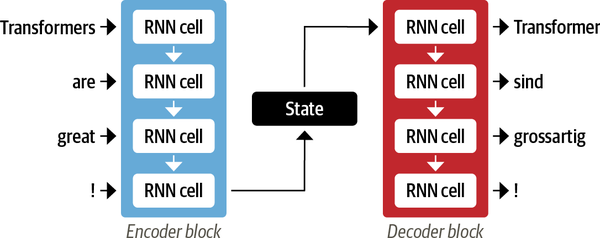

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

1. The last hidden state of the encoder is responsible for representing the meaning of the entire input sequence, which can create an information bottleneck.
2. It is especially problematic for longer sequences, where earlier information may be lost.
3. Using recurrent models for both the encoder and decoder can be slow because the computations are sequential and cannot be parallelized across the input sequence.



### 1.2.2 Issues with Attention based RNNs:
  **Attention Mechanism:** The attention mechanism in RNNs is used to prioritize which states of the encoder should be used by the decoder. Instead of using all the states at once, the decoder assigns different weights, or "attention," to each of the encoder states during each decoding timestep.

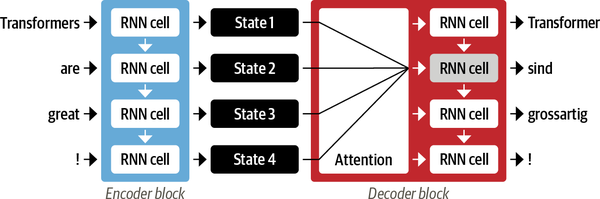

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

1. The major shortcoming of this architecture is that the computions in the encoder portion are still sequential and cannot be parallelized across the input sequence.




### 1.2.3 Original Transformer Architecture

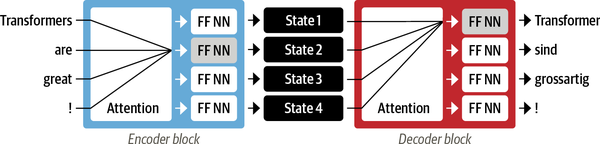

**Figure:** [Natural Language Processing with Transformers Book](https://transformersbook.com)

The transformer introduced a new approach to modeling by eliminating the need for recurrence and solely relying on **self-attention**, which is a unique form of attention.

**Self Attention:** The concept behind self-attention is to enable attention to work on all the states within a single layer of the neural network. In the provided diagram, the encoder and decoder each have their own self-attention mechanisms, which then feed their outputs to feed-forward neural networks (FF NN). This architecture allows for faster training compared to recurrent models and has been instrumental in many recent advancements in NLP.

In the next module, we will examine the encoder and decoder's internal operations and will be looking into Self Attention in detail.
